# Homework 4

- Execute the below code, then answer the numbered questions.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [2]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [3]:
# insert code here
numerical_features = []
categorical_features = []

for column in X_train.columns:
    if X_train[column].dtype in ['float64']:
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['condition', 'odometer', 'auction_value']
Categorical features: ['make', 'transmission', 'state']


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# insert code here
numerical_pipeline = Pipeline([
    ('impute_missing_numerical', SimpleImputer(strategy='median')),
    ('standardize_numerical', StandardScaler())
])

## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [5]:
from sklearn.preprocessing import OneHotEncoder

# insert code here
categorical_pipeline = Pipeline([
    ('impute_missing_categorical', SimpleImputer(strategy='most_frequent')), # Replace missing values with the most frequent
    ('encoder_categorical', OneHotEncoder(handle_unknown='ignore', drop='first')) # One-hot encode the categories
])

## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [6]:
from sklearn.compose import ColumnTransformer

# insert code here
processing_pipeline = ColumnTransformer(transformers=[('process_numeric', numerical_pipeline, numerical_features),
                                                      ('process_categorical', categorical_pipeline, categorical_features)])

processing_pipeline.fit(X_train)

processed_df = processing_pipeline.fit_transform(df)

print("Missing values: ", format(pd.DataFrame(processed_df).isnull().sum().sum())) # check for missing values 

Missing values:  0


## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [7]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lr', LinearRegression())
                             ])

modeling_pipeline.fit(X_train, y_train)

predictions = modeling_pipeline.predict(X_test)


from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R Squared value: ", r2)

R Squared value:  0.8838273915336571


## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

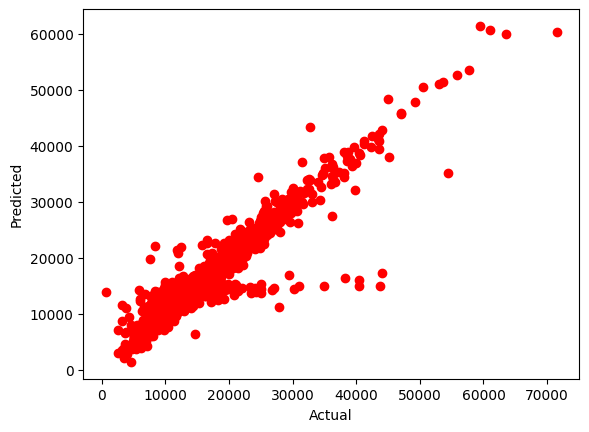

In [8]:
# insert code here

# insert code here

import matplotlib.pyplot as plt

plt.plot(y_test, predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted') 
plt.show()


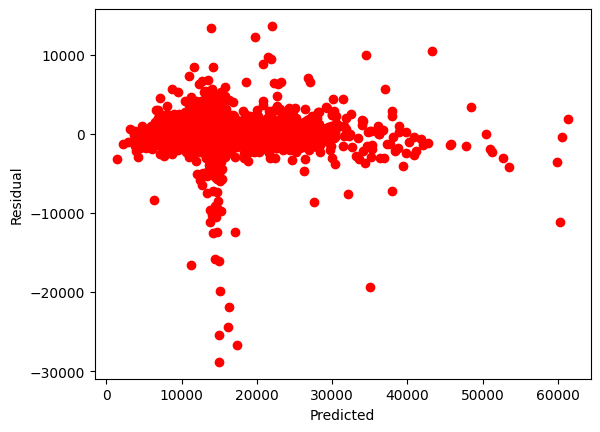

In [9]:
plt.plot(predictions, predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()


### Observations:

We can see detect a clear pattern or trend in the residuals, so we can conclude that the model has room for improvement.
 



## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [10]:
from sklearn.linear_model import Ridge

ridge_modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('ridge', Ridge(alpha=100))
                             ])

ridge_modeling_pipeline.fit(X_train, y_train)

predictions_ridge = ridge_modeling_pipeline.predict(X_test)


from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions_ridge)
print("R Squared value: ", r2)

R Squared value:  0.8825299865298665


### The difference in r2 score before and after ridge regression is very miniscule.